In [1]:
import numpy as np
from homography import pyrs12, spaces
import cv2, h5py, deproject, HandShapeAnalysis
import matplotlib.pyplot as plt
import pptk
# np.set_printoptions(threshold=np.inf)

In [2]:
def plt_imsize(image,size=(10,10)):
    fig1 = plt.figure(figsize=size) # create a figure with the default size 
    ax1 = fig1.add_subplot(1,1,1) 
    ax1.imshow(image, interpolation='none')
    plt.show()

In [ ]:
one = h5py.File('../recording_data/labeled/1_move_down_yes.hdf5', 'r')
org = one['pcl_center'][...]
mat = one['trans_matrix'][...]
analyser = HandShapeAnalysis.Depth2Finger(org, mat)
analyser.set_show(debug = True, finger_point_image = True, hull_image = True, detected_defect = True, 
                  cluster_point= True,  possibility_modal = False)

[[251  50]
 [246 121]
 [241 147]
 [203 168]
 [174 153]
 [148 113]
 [166  33]
 [179   2]
 [238   0]]
[ 97.12501635  84.80557109 167.90524292 149.41787046  24.37515401
  23.22149661  29.80642346  48.47778652 153.35012908]


[[203 168]
 [174 153]
 [241 149]
 [148 112]]


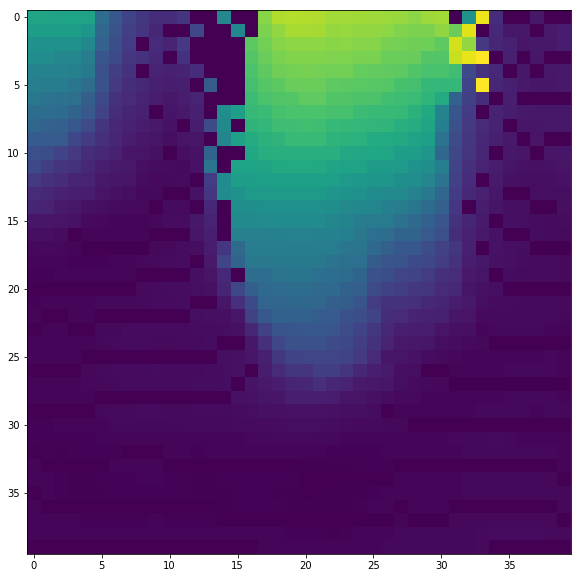

In [4]:
x = analyser.renew_high(one['depth'][len(one['color'])-1])
plt_imsize(np.concatenate((analyser.finger_point_image, 
                           analyser.detected_defect, 
                           analyser.finger_point_image),axis =1))
plt_imsize(analyser.finger_point_image)
print(analyser.finger_point)
plt_imsize(x[0][:,:,2])
v = pptk.viewer(x[0])

[[337 135]
 [327 208]
 [285 221]
 [257 211]
 [232 187]
 [254 114]
 [275  87]
 [317  92]
 [335 117]]
[122.27564431 158.55226367 143.13010235 110.21026922 159.21489166
  52.69605172  46.15706134  32.58215569  41.33262689]


[[284 221]
 [257 211]
 [327 209]
 [232 190]]


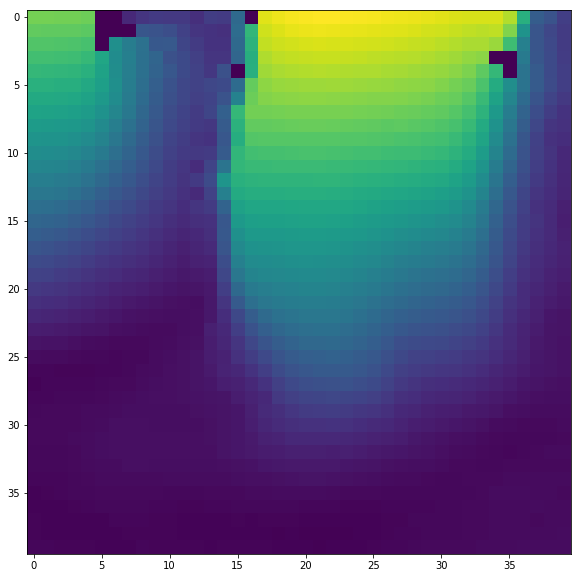

In [5]:
x = analyser.renew_depth(one['depth'][len(one['color'])-1])
plt_imsize(np.concatenate((analyser.finger_point_image, 
                           analyser.detected_defect, 
                           analyser.finger_point_image),axis =1))
plt_imsize( analyser.finger_point_image)
print(analyser.finger_point)
plt_imsize(x[0][:,:,2])
v = pptk.viewer(x[0])

In [6]:
analyser.cloud.shape

(307200, 3)

[[337 135]
 [327 208]
 [285 221]
 [257 211]
 [232 187]
 [254 114]
 [275  87]
 [317  92]
 [335 117]]
[122.27564431 158.55226367 143.13010235 110.21026922 159.21489166
  52.69605172  46.15706134  32.58215569  41.33262689]


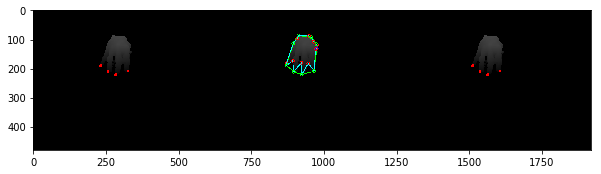

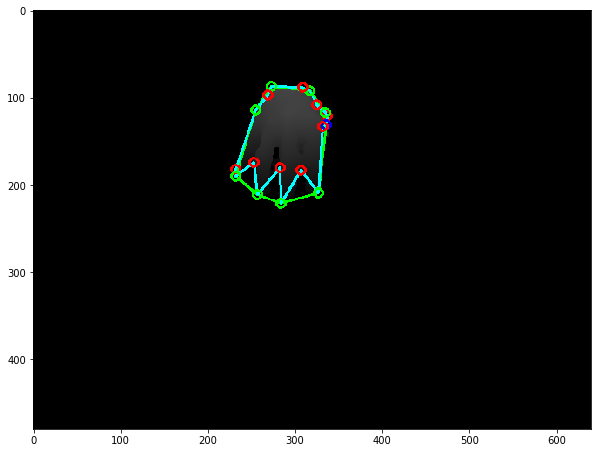

[[284 221]
 [257 211]
 [327 209]
 [232 190]]


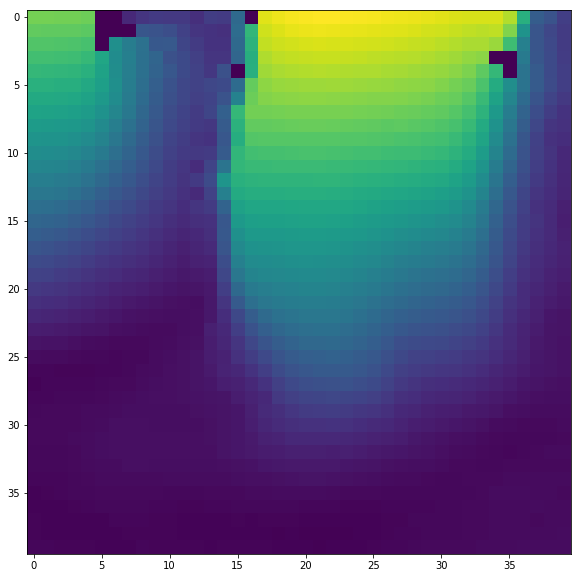

In [7]:
x = analyser.renew_depth(one['depth'][len(one['color'])-1])
plt_imsize(np.concatenate((analyser.finger_point_image, 
                           analyser.detected_defect, 
                           analyser.finger_point_image),axis =1))
plt_imsize( analyser.detected_defect)
print(analyser.finger_point)
plt_imsize(x[0][:,:,2])
v = pptk.viewer(x[0])

In [8]:
analyser = HandShapeAnalysis.Depth2Finger(org, mat)
analyser.set_show(debug = False, finger_point_image = False, hull_image = False, detected_defect = False, 
                  cluster_point= False,  possibility_modal = False)

In [9]:
timeit x = analyser.renew_depth(one['depth'][len(one['color'])-1])

42.6 ms ± 1.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
timeit x = analyser.renew_high(one['depth'][len(one['color'])-1])

98.6 ms ± 6.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
